In [3]:
#%pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color='blue'> 2. Importing Data


In [4]:
# <font color='blue'> 2. Importing Data


In [6]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

In [7]:
# Dataset name / Path
path = 'fraud_oracle.csv'

# Read the data
df = read_data(path = path)
df.head()

Data shape: (15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [8]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

# <font color='blue'> 3. Splitting Data
    
___

In [9]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y


In [10]:
# Split input x and output y
X, y = split_input_output(data = df,
                          target_column = "FraudFound_P")

# Show 5 first rows of input
X.head()

X shape: (15420, 32)
y shape : (15420,)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [11]:
# Show 5 first rows of output
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudFound_P, dtype: int64

In [12]:
# check data dimension
n_samples, n_features = X.shape

# print number samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")

Number of samples  : 15420
Number of features : 32


In [13]:
# check data features name
features_names = X.columns

# print name of features
print(f"name of features : {features_names}")

name of features : Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [25]:
checked = ['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',

       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault',

       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PolicyNumber',

       'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident',

       'PastNumberOfClaims', 'AgeOfPolicyHolder', 'PoliceReportFiled',

       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',

       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'AgeOfVehicle']

mine = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy']

len(list(set(mine).intersection(set(checked))))


26

In [30]:
list(set(features_names)-set(checked))

['Year', 'Days_Policy_Claim', 'DayOfWeek', 'Make', 'WeekOfMonth', 'Month']

In [35]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [34]:
#%pip install scikit-learn

In [36]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (9252, 32)
y train shape: (9252,)
X valid shape : (3084, 32)
y valid shape : (3084,)
X test shape : (3084, 32)
y test shape : (3084,)


# <font color='blue'> 4. Exploratory Data Analysis

- Ideally, we perform EDA to get to know the data better by
  - Finding the data distribution / correlation
  - Finding the outlier and red flag
  - Finding how to handle missing values
  - etc.

- In this session, we:
  - Check for statistics decriptives
  - Check outlier and red flag
  - Check for missing values
  - Check for data distribution

- Then, we can plan for pre-processing steps if need

In [40]:
# Print train set shape
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (9252, 32)
y train shape: (9252,)


In [41]:
# create EDA dataset
eda_df = pd.concat([X_train, y_train],
                   axis=1)
eda_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
2839,Jan,1,Tuesday,Pontiac,Urban,Thursday,Jan,1,Male,Married,...,51 to 65,No,No,External,more than 5,no change,1 vehicle,1994,Liability,0
5783,Mar,2,Friday,Pontiac,Urban,Friday,Mar,2,Male,Married,...,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils,0
10425,Jan,1,Tuesday,Pontiac,Rural,Monday,Jan,2,Male,Married,...,36 to 40,No,No,External,none,no change,1 vehicle,1995,Collision,0
10966,Jan,1,Thursday,Toyota,Urban,Wednesday,Jan,2,Male,Married,...,51 to 65,No,No,External,none,no change,1 vehicle,1995,Liability,0
14520,Jul,2,Sunday,Dodge,Rural,Tuesday,Jul,2,Female,Single,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability,0


In [42]:
# Print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (9252, 33)


## 4.1 Check for statistics descriptives
___

In [43]:
# Check min, max and quartile values
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,9252.0,2.789667,1.281091,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,9252.0,2.698768,1.256675,1.0,2.00,3.0,4.00,5.0
Age,9252.0,39.852140,13.516529,0.0,30.00,38.0,48.00,80.0
PolicyNumber,9252.0,7672.495460,4431.670354,1.0,3830.75,7702.0,11467.75,15420.0
RepNumber,9252.0,8.408560,4.616051,1.0,4.00,8.0,12.00,16.0
Deductible,9252.0,408.365759,46.301417,300.0,400.00,400.0,400.00,700.0
DriverRating,9252.0,2.499676,1.119157,1.0,1.00,3.0,3.00,4.0
Year,9252.0,1994.857112,0.800571,1994.0,1994.00,1995.0,1996.00,1996.0
FraudFound_P,9252.0,0.059879,0.237275,0.0,0.00,0.0,0.00,1.0


In [50]:
#eda_df.select_dtypes(include='int64').info()

## 4.2 Check for missing values
___

In [51]:
eda_df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound_P            0
dtype: int64

**Summary**
- There are no missing values

## 4.3 Check for distribution


### **1. Class Proportion**


In [54]:
eda_df["FraudFound_P"].value_counts(normalize = True)

FraudFound_P
0    0.940121
1    0.059879
Name: proportion, dtype: float64

In [55]:
eda_df["FraudFound_P"].value_counts()

FraudFound_P
0    8698
1     554
Name: count, dtype: int64

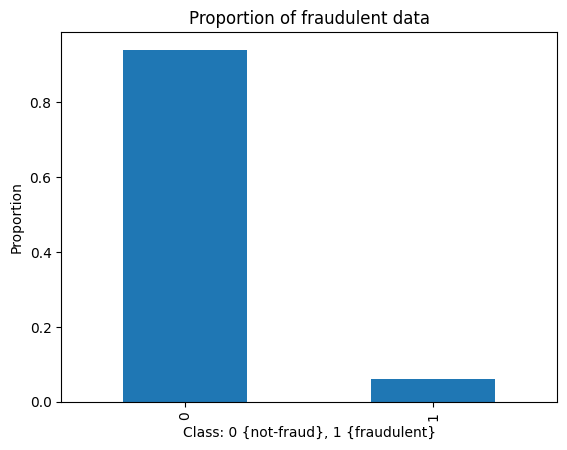

In [56]:
# Plot
(
    eda_df["FraudFound_P"]
    .value_counts(normalize = True)
    .plot
    .bar()
)

plt.xlabel("Class: 0 {not-fraud}, 1 {fraudulent}")
plt.ylabel("Proportion")
plt.title("Proportion of fraudulent data")
plt.show()

Only 5.9% fraud found in training data (which is good!, what happen if the company has the other way around?)

Next, check each variable's distribution and whether there's any difference in input variables related to the output

### **2. Accident Area**


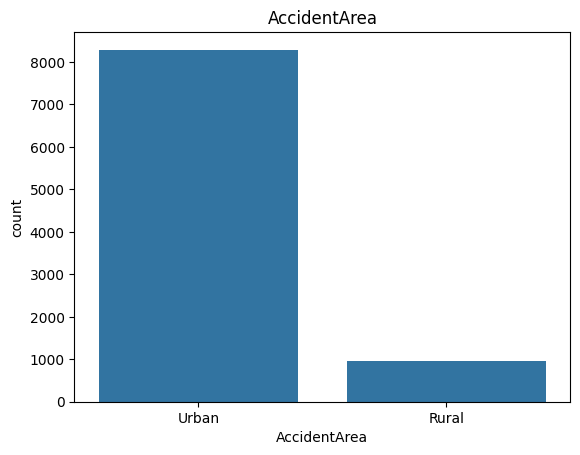

In [59]:
# Visualize the AccidentArea
sns.countplot(data = eda_df,
              x = "AccidentArea")

plt.title("AccidentArea")
plt.show()

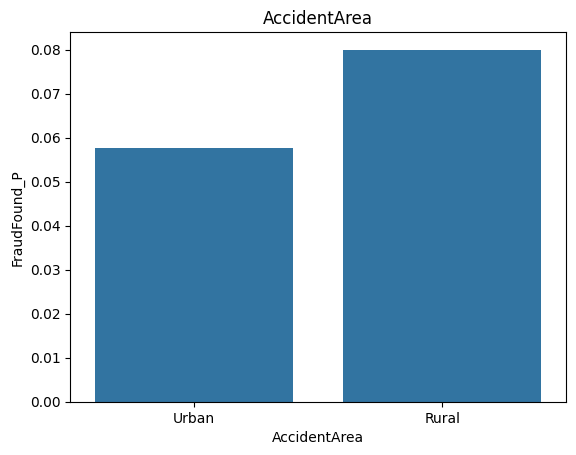

In [60]:
# Visualize the AccidentArea
sns.barplot(data = eda_df,
            x = "AccidentArea",
            y = "FraudFound_P",
            errorbar = None)

plt.title("AccidentArea")
plt.show()

- Most accidents were taking place in urban area
- Rural area have higher probability of fraud than urban area

### **3. Police Report Filed**


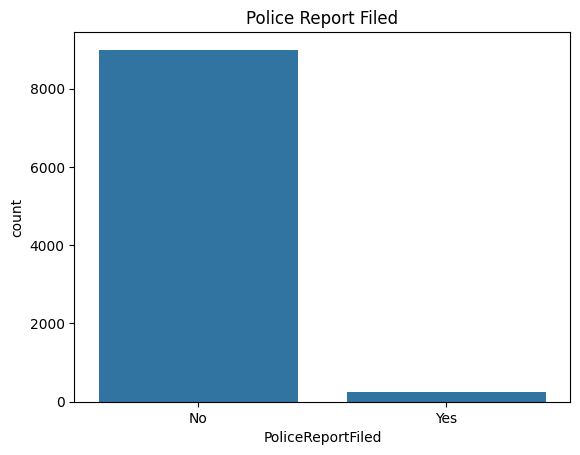

In [61]:
# Visualize the Police Report Filed
sns.countplot(data = eda_df,
              x = "PoliceReportFiled")

plt.title("Police Report Filed")
plt.show()

In [62]:
eda_df['PoliceReportFiled'].value_counts()

PoliceReportFiled
No     8995
Yes     257
Name: count, dtype: int64

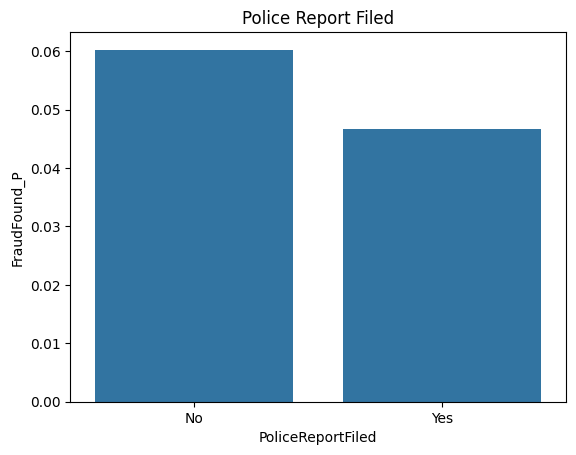

In [63]:
# Visualize the Police Report Filed
sns.barplot(data = eda_df,
            x = "PoliceReportFiled",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Police Report Filed")
plt.show()

In [64]:
eda_df[['PoliceReportFiled','FraudFound_P']].value_counts()

PoliceReportFiled  FraudFound_P
No                 0               8453
                   1                542
Yes                0                245
                   1                 12
Name: count, dtype: int64

In [86]:
#eda_df[['PoliceReportFiled','FraudFound_P']].value_counts(normalize=True)


In [83]:
eda_df.groupby('PoliceReportFiled')['FraudFound_P'].value_counts(normalize=True)

PoliceReportFiled  FraudFound_P
No                 0               0.939744
                   1               0.060256
Yes                0               0.953307
                   1               0.046693
Name: proportion, dtype: float64

In [85]:
eda_df.groupby('PoliceReportFiled')['FraudFound_P'].value_counts(normalize=True).loc[:,1]

PoliceReportFiled
No     0.060256
Yes    0.046693
Name: proportion, dtype: float64

- Very small counts of accidents having  police report filed
- Not having police report filed have higher probability of fraud than having police report filed

### **4. Witness Present**


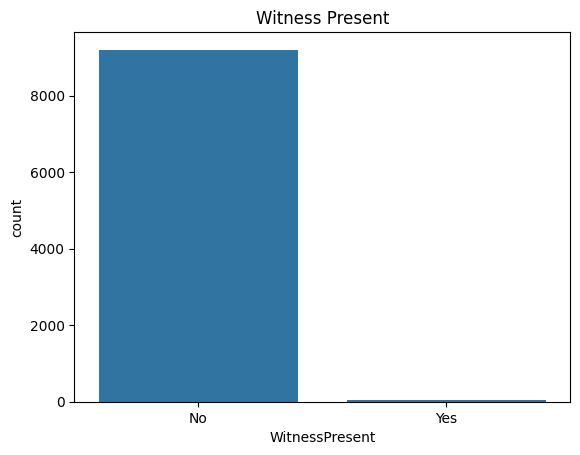

In [88]:
# Visualize the WitnessPresent
sns.countplot(data = eda_df,
              x = "WitnessPresent")

plt.title("Witness Present")
plt.show()

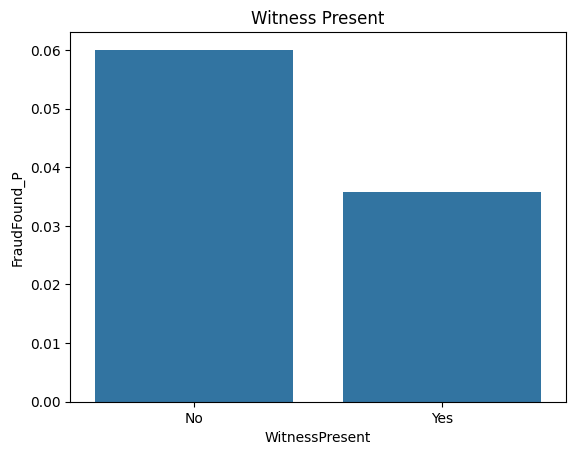

In [89]:
# Visualize the Witness Present
sns.barplot(data = eda_df,
            x = "WitnessPresent",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Witness Present")
plt.show()

- Most accidents having no witness present police report filed
- Accidents that have no witness have higher probability of fraud than accidents that having witness

### **5. Vehicle Category**
___

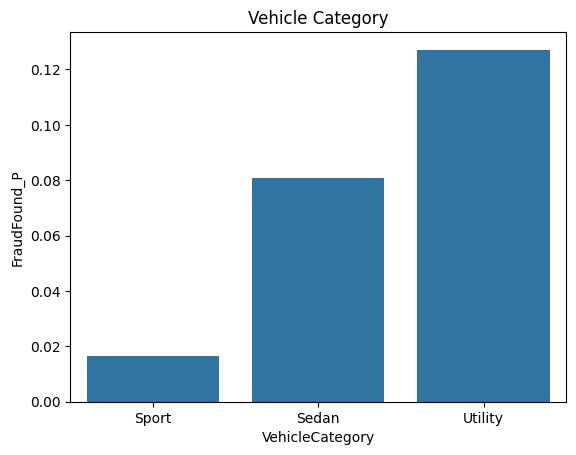

In [92]:
# Visualize the VehicleCategory
sns.barplot(data = eda_df,
            x = "VehicleCategory",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Vehicle Category")
plt.show()

- Most claims having sedan category
- Claims with utility category have higher probability of fraud than others

### **6. Vehicle Price**


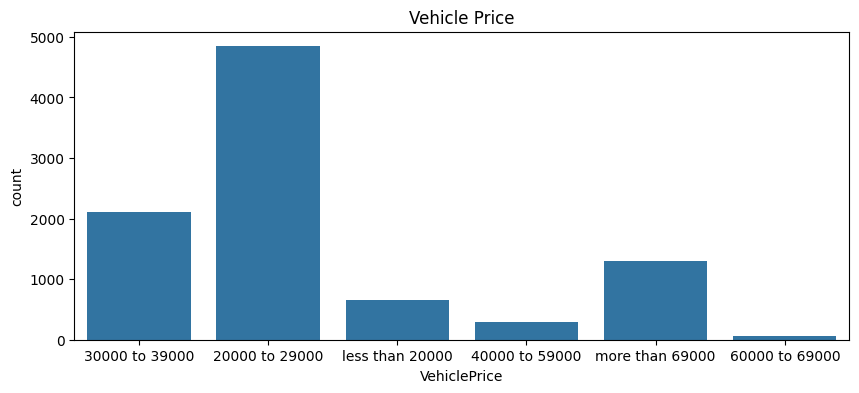

In [95]:
# Visualize the VehiclePrice
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
              x = "VehiclePrice")

plt.title("Vehicle Price")
plt.show()

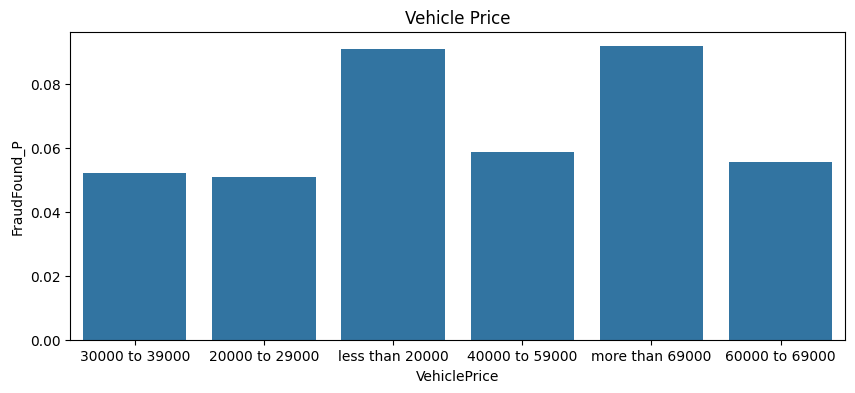

In [96]:
# Visualize the VehiclePrice
plt.figure(figsize = (10,4))
sns.barplot(data = eda_df,
            x = "VehiclePrice",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Vehicle Price")
plt.show()

- Mosts claims have 20k to 29k vehicle price
- Claims with vehicle price under 20k or more than 69k have higher probability fraud than others

### **11. Age**


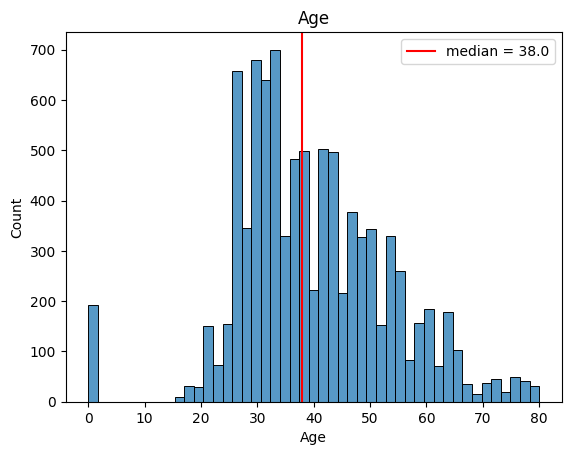

In [100]:
# Visualize the Age
sns.histplot(data = eda_df,
             x = "Age")
plt.axvline([eda_df["Age"].median()],
            color = "r",
            label = f"median = {eda_df['Age'].median()}")
plt.legend()
plt.title("Age")
plt.show()

In [101]:
# Descriptive of age by response fraud
eda_df['Age'].groupby(eda_df["FraudFound_P"]).describe()

,count,mean,std,min,25%,50%,75%,max
FraudFound_P,,,,,,,,
0,8698.0,39.910324,13.427322,0.0,30.25,38.0,49.00,80.0
1,554.0,38.938628,14.830319,0.0,30.00,38.0,46.75,80.0


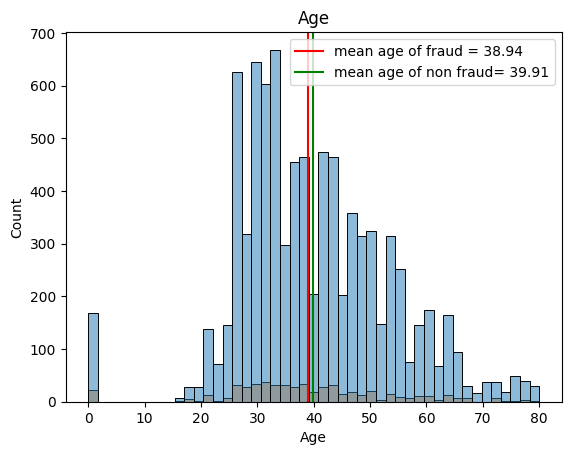

In [102]:
# Visualize the Ages
sns.histplot(data = eda_df,
             x = "Age",
             hue = "FraudFound_P")

fraud_age = eda_df[eda_df["FraudFound_P"] == 1]["Age"]
nonfraud_age = eda_df[eda_df["FraudFound_P"] == 0]["Age"]

plt.axvline([fraud_age.mean()],
            color = "r",
            label = f"mean age of fraud = {np.round(fraud_age.mean(), 2)}")

plt.axvline([nonfraud_age.mean()],
            color = "g",
            label = f"mean age of non fraud= {np.round(nonfraud_age.mean(), 2)}")

plt.legend()
plt.title("Age")
plt.show()

- The distribution of age is nearly normal distributed
- However there's unexpecting value of 0 age
- The average of fraudulant claimants' age is not far differ than the non fraudulent claimants